In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For creating a detailed profiling report
from ydata_profiling import ProfileReport

# For encoding categorical features
from sklearn.preprocessing import LabelEncoder

# For splitting the data and building the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# import the data
df = pd.read_csv('5G_energy_consumption_dataset.csv')
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [5]:
# summary stats
df.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


In [6]:
# profile report
profile = ProfileReport(df, title="5G Energy Consumption Profiling Report")
profile.to_file("5G_energy_consumption_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile.to_notebook_iframe()

In [8]:
# check for missing values
df.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

In [9]:
# check for duplicate records
df.duplicated().sum()

np.int64(0)

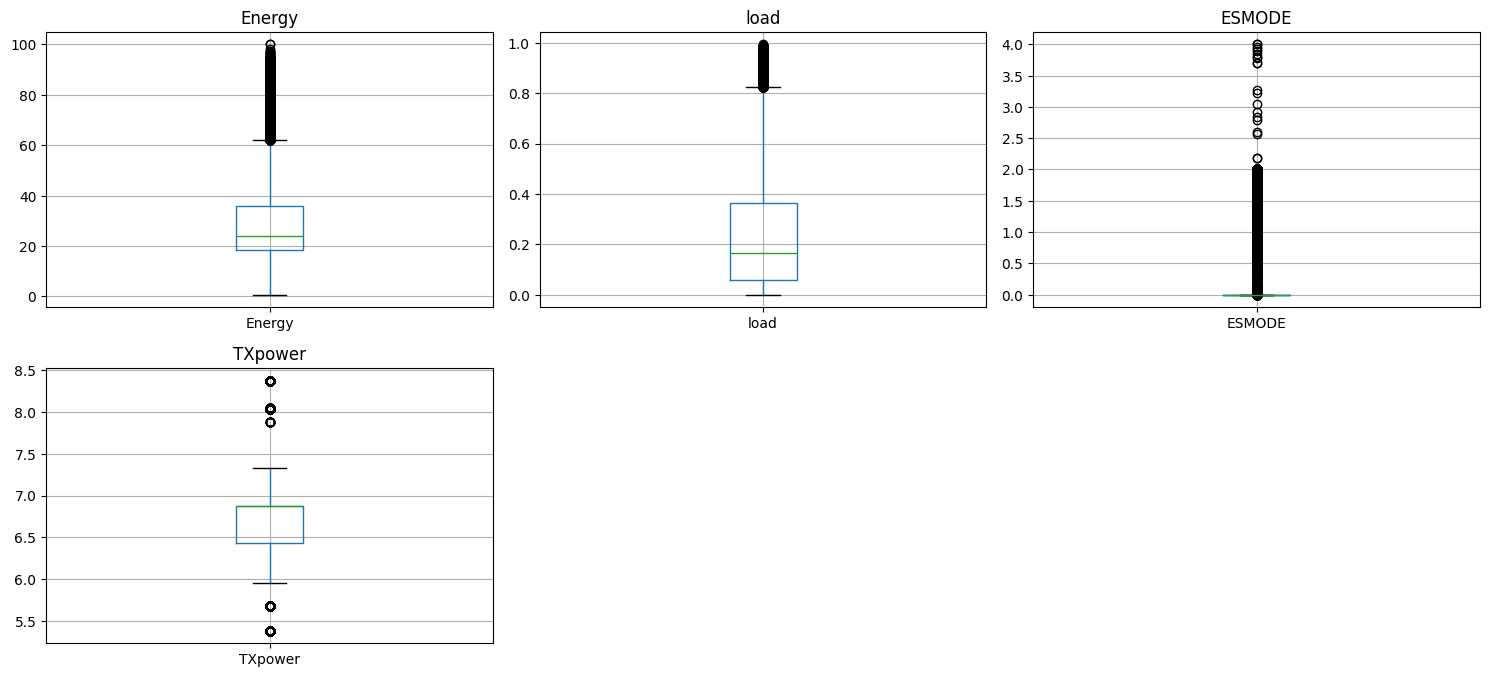

In [10]:
# Plot boxplots for each numeric column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    df.boxplot(column=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [11]:
#Handle Outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [12]:
# Remove outliers in 'Energy'
df_clean = remove_outliers(df, 'Energy')
# Remove outliers in 'load' 
df_clean = remove_outliers(df_clean, 'load')

In [13]:
# Encode Categorical Features
df_encoded = pd.get_dummies(df_clean, columns=['BS'], drop_first=True)

In [14]:
# select target variable and features
# we aim to predict the 'Energy' consumption.
# the 'Time' column is not used directly for prediction, so drop it.
X = df_encoded.drop(['Time', 'Energy'], axis=1)
y = df_encoded['Energy']

In [15]:
#  split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# select a ML regression algorithm and train it on the training set
# create an instance of the linear regression model, fit it to the data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Assess your model performance on the test set using relevant evaluation metrics
# predict the Energy consumption for the test set.
y_pred = model.predict(X_test)

In [18]:
# Compute evaluation metrics:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [19]:
print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation Metrics:
MAE: 1.94
MSE: 8.57
RMSE: 2.93
R² Score: 0.94
